In [7]:
import sys
from pathlib import Path


import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import classification_report


from spnc import spnc_anisotropy
import spnc_ml as ml





In [8]:
def NRMSE(Y,Y_pred):
    var = np.var(Y)
    return np.sqrt(np.square(Y_pred-Y).mean()/var)

def NRMSE_list(y,y_pred):
    Y = np.array(y)
    Y_pred = np.array(y_pred)
    return(NRMSE(Y,Y_pred))

In [9]:
# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 451
m0 = 0.0028413255721706785
bias = True

# Reservoir parameters
h = 0.31519599682298843
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

In [10]:
# Params
params = {
    'theta':0.35634405452788, 
    'gamma':0.1397481344929035, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'None',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  451
Deterministic mask will be used
1234
current phase: train
p1 in train & fast: 0.5000000893700353
noise-free training output
restarted
Training data size:  902000
Training data shape:  (2000, 451)
Seed Training: 1234
current phase: test
p1 in test & fast: 0.5000000893700353
noise-free testing output
restarted
Spacer NRMSE:0
0.0025424167927705034 0.45562162563946856


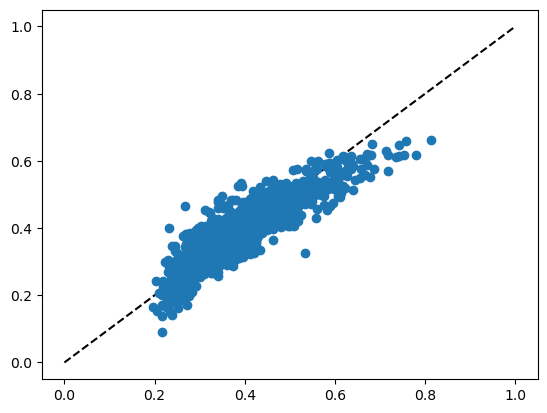

In [11]:
spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)

transformf = spn.gen_signal_fast_delayed_feedback

# run

(y_test_f,y_pred_f) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

with slow?

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  451
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.5000000893700353
noise_seed: 1234
noise_mean: 0.0001
noise-free training output
restarted
Training data size:  902000
Training data shape:  (2000, 451)
Seed Training: 1234
current phase: test
p1 in test & slow: 0.5000000893700353
noise_seed: 1234
noise_mean: 0.0001
noise-free testing output
restarted
Spacer NRMSE:0
0.005159439372163185 0.6490560640070355


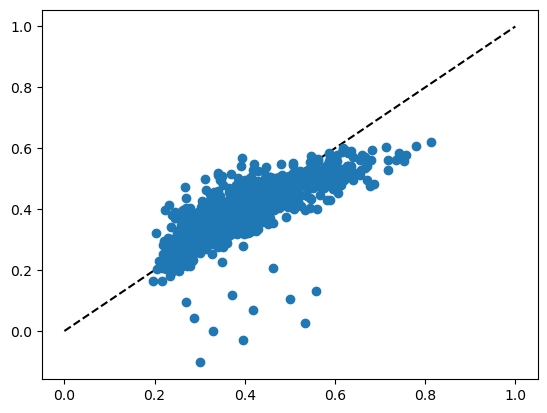

In [12]:
spn1 = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)

transform1 = spn1.gen_signal_slow_delayed_feedback

# run

(y_test_1,y_pred_1) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transform1,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

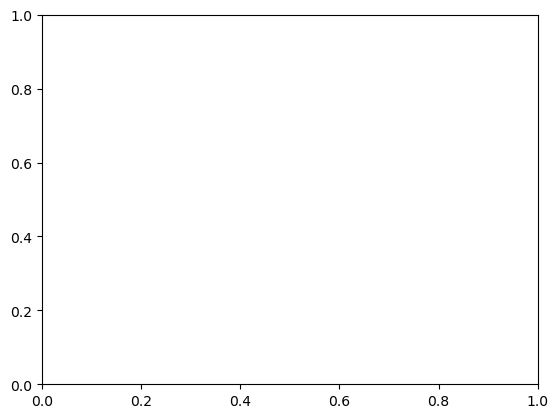

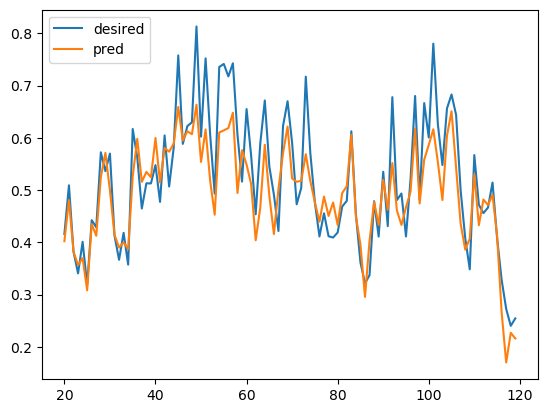

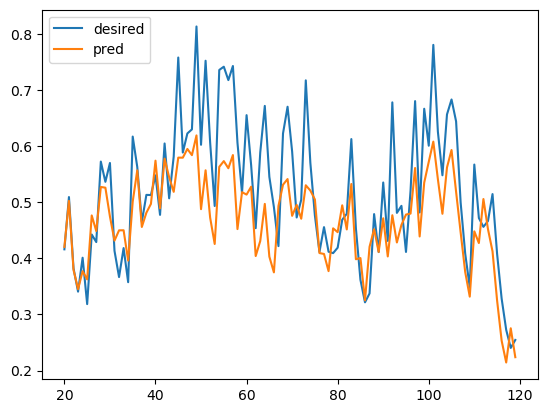

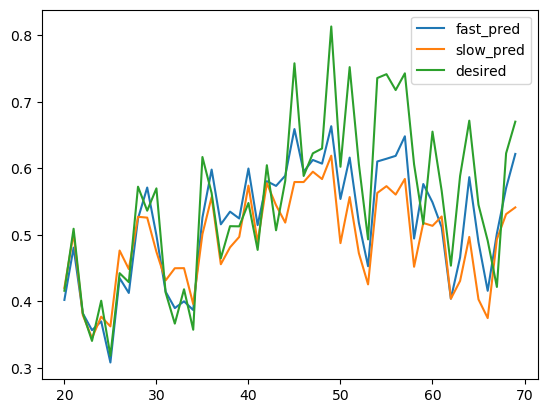

In [38]:
spac = 20
window = 100

x_axis = range(spac, spac+window)

plt.figure()
plt.plot(x_axis, y_test_f[spac:spac+window],label='desired')
plt.plot(x_axis, y_pred_f[spac:spac+window],label='pred')
plt.legend()
plt.show()

plt.figure()
plt.plot(x_axis,y_test_1[spac:spac+window],label='desired')
plt.plot(x_axis,y_pred_1[spac:spac+window],label='pred')
plt.legend()
plt.show()

window = 50
x_axis = range(spac, spac+window)

plt.figure()
plt.plot(x_axis, y_pred_f[spac:spac+window],label='fast_pred')
plt.plot(x_axis,y_pred_1[spac:spac+window],label='slow_pred')
plt.plot(x_axis, y_test_f[spac:spac+window],label='desired')
plt.legend()
plt.show()




In [28]:
spac = 20
print(NRMSE_list(y_test_1[spac:],y_pred_1[spac:]))
print(NRMSE_list(y_test_f[spac:],y_pred_f[spac:]))

0.5539116269062013
0.4495457973542353
